**Movie Ratings Dashboard**

- Use [IMDB/MovieLens dataset](https://grouplens.org/datasets/movielens/).
- Pandas: group by genre, calculate average rating, most-rated movies.
- NumPy: create rating distributions, normalize rating scales if needed.
- Plot: bar chart of avg ratings by genre, scatter plot of rating vs. number of reviews.


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
links_csv = pd.read_csv("../data/ml-32m/links.csv")
movies_csv = pd.read_csv("../data/ml-32m/movies.csv")
ratings_csv = pd.read_csv("../data/ml-32m/ratings.csv")
tags_csv = pd.read_csv("../data/ml-32m/tags.csv")

In [30]:
ratings_mean =ratings_csv.groupby(by="movieId").agg(
    rating=("rating", "mean"),
    rating_count=("rating", "size")
).reset_index()

movies_sample = (
    movies_csv
    .merge(links_csv, on="movieId", how="inner")
    .merge(ratings_mean, on="movieId", how="left") 
).sample(100,random_state=10)
movies =movies_sample.merge(tags_csv, on="movieId", how="left") 


In [31]:
top_rated = movies[movies.rating_count > 50].sort_values("rating", ascending=False).head(10)
most_rated = movies.sort_values("rating_count", ascending=False).head(10)


In [32]:
movies['rating'] = movies['rating'].fillna(0).apply(lambda x: x*2) 
movies['rating'].max()

np.float64(9.0)

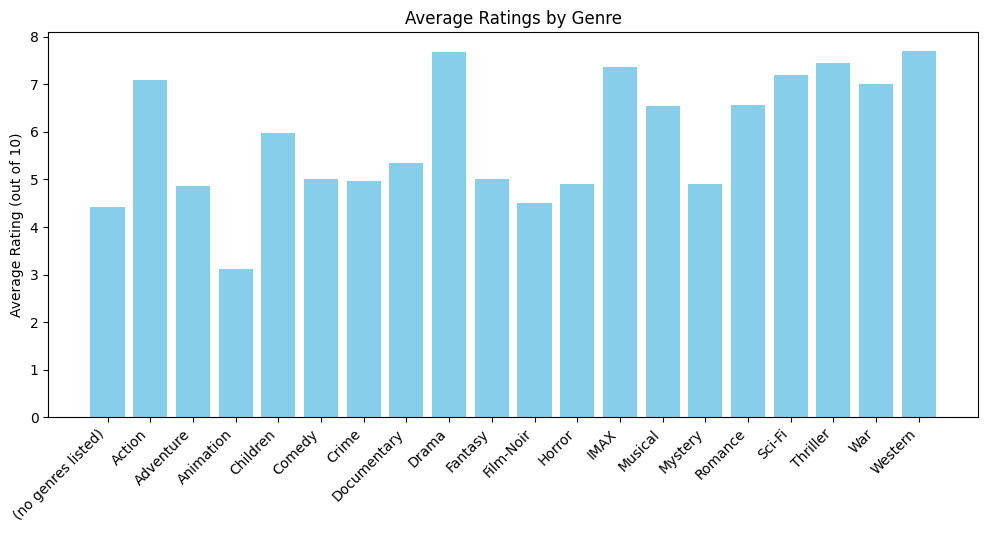

In [35]:
plt.figure(figsize=(12,5))
movies_exploded = movies.assign(genres=movies['genres'].str.split('|')).explode('genres')
rating_with_genre = (
    movies_exploded.groupby("genres")["rating"].mean().round(2).reset_index()
)
plt.bar(rating_with_genre.genres, rating_with_genre.rating, color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Rating (out of 10)")
plt.title("Average Ratings by Genre")
plt.show()


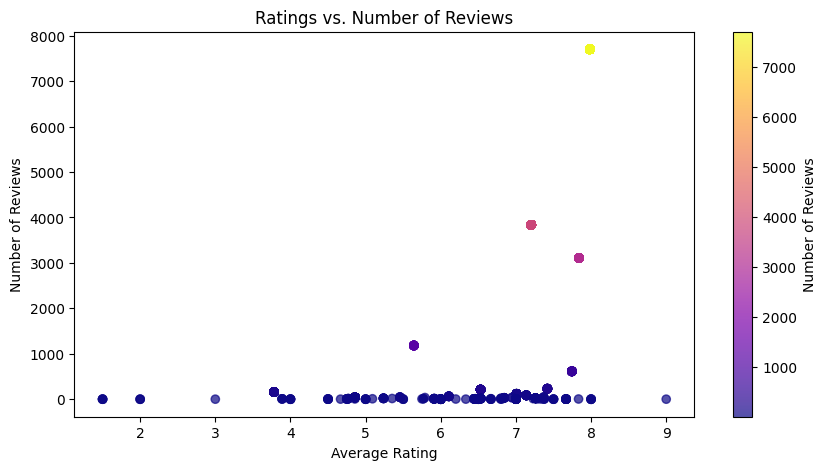

In [34]:
plt.figure(figsize=(10,5))
plt.scatter(movies.rating, movies.rating_count,
            c=movies.rating_count, cmap="plasma", alpha=0.7)
plt.xlabel("Average Rating")
plt.ylabel("Number of Reviews")
plt.title("Ratings vs. Number of Reviews")
plt.colorbar(label="Number of Reviews")
plt.show()
